In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from traitlets import validate
import sklearn.model_selection
import numpy as np
import tensorflow as tf
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
train_df = pd.DataFrame()
#start_path="/kaggle/input/product-classify/Product Classification"
start_path="C:/Users/dell/Downloads/Product Classification/Product Classification"
for i in range(1,21):
    all_path=start_path+"/"+str(i)+"/"+"Train"+"/"
    temp_images=os.listdir(all_path)
    temp_df=pd.DataFrame(temp_images,columns=["images"])
    temp_df["images"]=all_path+ temp_df["images"]
    temp_df["labels"]=i-1
    train_df=pd.concat([train_df,temp_df],ignore_index=True)
    
train_df["images"][0]

'C:/Users/dell/Downloads/Product Classification/Product Classification/1/Train/web1.png'

In [4]:
train_df["mat_images"]=train_df['images'].apply(lambda x: cv2.resize(cv2.imread(x) ,( 224, 224)))


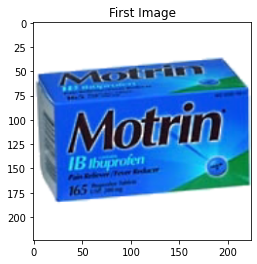

In [5]:
first_image = train_df["mat_images"].iloc[0]
plt.imshow(first_image, cmap='gray')
plt.title("First Image")
plt.show()

In [7]:
Validation_df = pd.DataFrame()
start_path="C:/Users/dell/Downloads/Product Classification/Product Classification"
for i in range(1,21):
    all_path=start_path+"/"+str(i)+"/"+"Validation"+"/"
    temp_images=os.listdir(all_path)
    temp_df=pd.DataFrame(temp_images,columns=["images"])
    temp_df["images"]=all_path+ temp_df["images"]
    temp_df["labels"]=i-1
    Validation_df=pd.concat([Validation_df,temp_df],ignore_index=True)
    
Validation_df


,images,labels
0,C:/Users/dell/Downloads/Product Classification...,0
1,C:/Users/dell/Downloads/Product Classification...,0
2,C:/Users/dell/Downloads/Product Classification...,0
3,C:/Users/dell/Downloads/Product Classification...,1
4,C:/Users/dell/Downloads/Product Classification...,1
5,C:/Users/dell/Downloads/Product Classification...,2
6,C:/Users/dell/Downloads/Product Classification...,2
7,C:/Users/dell/Downloads/Product Classification...,3
8,C:/Users/dell/Downloads/Product Classification...,3
9,C:/Users/dell/Downloads/Product Classification...,4


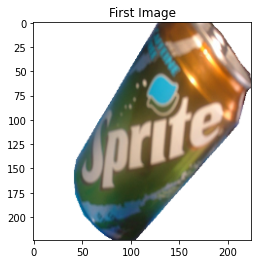

In [11]:
Validation_df["mat_images"]=Validation_df['images'].apply(lambda x: cv2.resize(cv2.imread(x) ,( 224, 224)))
first_image = Validation_df["mat_images"].iloc[10]
plt.imshow(first_image, cmap='gray')
plt.title("First Image")
plt.show()                                                                               

In [12]:
train_df=train_df.sample(frac=1, random_state=42).reset_index(drop=True)
Validation_df=Validation_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [13]:
x_train=train_df["mat_images"]/255
y_train=train_df["labels"]
x_test=Validation_df["mat_images"]/255
y_test=Validation_df["labels"]
x_train

0      [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
1      [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
2      [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
3      [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
4      [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
                             ...                        
135    [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
136    [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
137    [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
138    [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
139    [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
Name: mat_images, Length: 140, dtype: object

In [14]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,20)
y_test=to_categorical(y_test,20)


In [15]:
y_test

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [16]:
x_train = np.array([np.array(x, dtype=np.float32) for x in x_train], dtype=object)
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test = np.array([np.array(x, dtype=np.float32) for x in x_test], dtype=object)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140, 224, 224, 3)
(140, 20)
(35, 224, 224, 3)
(35, 20)


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = datagen.flow(x_train, y_train)
print(train_generator)

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(20, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 93312)             0         
                                                                 
 dense (Dense)               (None, 256)               2

In [25]:
model.fit(train_generator, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
5/5 [==============================] - 4s 541ms/step - loss: 9.3624 - accuracy: 0.0714 - val_loss: 5.2760 - val_accuracy: 0.1143
Epoch 2/20
5/5 [==============================] - 3s 517ms/step - loss: 4.3494 - accuracy: 0.1071 - val_loss: 2.9106 - val_accuracy: 0.2286
Epoch 3/20
5/5 [==============================] - 3s 510ms/step - loss: 2.8235 - accuracy: 0.1786 - val_loss: 2.4466 - val_accuracy: 0.1429
Epoch 4/20
5/5 [==============================] - 3s 506ms/step - loss: 2.4596 - accuracy: 0.1857 - val_loss: 2.1583 - val_accuracy: 0.2857
Epoch 5/20
5/5 [==============================] - 3s 500ms/step - loss: 2.2438 - accuracy: 0.2714 - val_loss: 1.7434 - val_accuracy: 0.4857
Epoch 6/20
5/5 [==============================] - 3s 504ms/step - loss: 2.0403 - accuracy: 0.3429 - val_loss: 1.6442 - val_accuracy: 0.5143
Epoch 7/20
5/5 [==============================] - 3s 504ms/step - loss: 1.7277 - accuracy: 0.4500 - val_loss: 1.1609 - val_accuracy: 0.6857
Epoch 8/20
5/5 [====

In [26]:
model.save('vision9482.h5')

c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


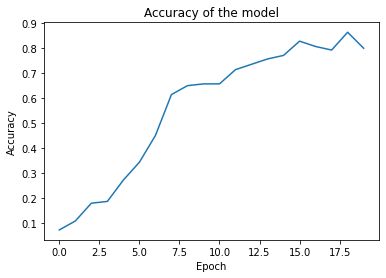

In [27]:
plt.plot(model.history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model')
plt.show()

In [34]:
model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

#model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(20, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 8)       0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 26, 26, 32)       

In [ ]:
model.fit(train_generator, epochs=20, validation_data=(x_test, y_test))

In [66]:
model.save('vision91.h5')

In [64]:
model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

#model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(20, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 111, 111, 8)       0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 54, 54, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 52, 52, 32)        4640      
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 26, 26, 32)      

In [65]:
model.fit(train_generator, epochs=50, validation_data=(x_test, y_test))

Epoch 1/40
5/5 [==============================] - 3s 418ms/step - loss: 3.2899 - accuracy: 0.0571 - val_loss: 2.9169 - val_accuracy: 0.3143
Epoch 2/40
5/5 [==============================] - 2s 387ms/step - loss: 2.9246 - accuracy: 0.0857 - val_loss: 2.7186 - val_accuracy: 0.1429
Epoch 3/40
5/5 [==============================] - 2s 375ms/step - loss: 2.7498 - accuracy: 0.1214 - val_loss: 2.4122 - val_accuracy: 0.2286
Epoch 4/40
5/5 [==============================] - 2s 375ms/step - loss: 2.5246 - accuracy: 0.2000 - val_loss: 2.1697 - val_accuracy: 0.3429
Epoch 5/40
5/5 [==============================] - 2s 362ms/step - loss: 2.3118 - accuracy: 0.2786 - val_loss: 2.0144 - val_accuracy: 0.3143
Epoch 6/40
5/5 [==============================] - 2s 369ms/step - loss: 2.1013 - accuracy: 0.3357 - val_loss: 1.7443 - val_accuracy: 0.4571
Epoch 7/40
5/5 [==============================] - 2s 364ms/step - loss: 2.0025 - accuracy: 0.3643 - val_loss: 1.4998 - val_accuracy: 0.4857
Epoch 8/40
5/5 [====

In [60]:
model.save('vision91e96a.h5')

In [46]:
model.save('vision94e.h5')

In [ ]:
import os
from keras.models import load_model

# Assuming 'specific_folder' is the name of the folder you want to save the model in
specific_folder = 'your_specific_folder'

# Create the folder if it doesn't exist
if not os.path.exists(specific_folder):
    os.makedirs(specific_folder)

# Save the model in the specific folder
model.save(os.path.join(specific_folder, 'vision94.h5'))